# Aprendizaje Automático - Práctica 2 - Complejidad de H y Modelos Lineales




---

## <font color='blue'>Ejercicio 1: COMPLEJIDAD DE H Y EL RUIDO (4 puntos)</font>

<font color='blue'>En este ejercicio intentaremos profundizar un poco en la dificultad que introduce el ruido de las etiquetas en la elección de la clase de funciones más adecuada para resolver un determinado problema. 



In [75]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd


# Fijamos la semilla aleatoria
np.random.seed(1)

<font color='blue'>Haremos uso de tres funciones, que se incluyen a continuación: 

<font color='blue'>$simula\_unif(N, dim, rango)$, que calcula una lista de $N$ vectores de dimensión $dim$. Cada vector contiene $dim$ números aleatorios uniformes en el intervalo $rango$.

In [76]:
def simula_unif(N, dim, rango):
	return np.random.uniform(rango[0],rango[1],(N,dim))

<font color='blue'>$simula\_gauss(N, dim, sigma)$, que calcula una lista de longitud $N$ de vectores de dimensión $dim$, donde cada posición del vector contiene un número aleatorio extraído de una distribucción Gaussiana de media 0 y varianza dada (para cada dimension, por la posición del vector $sigma$).

In [77]:
def simula_gauss(N, dim, sigma):
    media = 0    
    out = np.zeros((N,dim),np.float64)        
    for i in range(N):
        # Para cada columna dim se emplea un sigma determinado. Es decir, para 
        # la primera columna (eje X) se usará una N(0,sqrt(sigma[0])) 
        # y para la segunda (eje Y) N(0,sqrt(sigma[1]))
        out[i,:] = np.random.normal(loc=media, scale=np.sqrt(sigma), size=dim)
    
    return out

<font color='blue'>$simula\_recta(intervalo)$, que simula de forma aleatoria los parámetros $v = (a, b)$ de una
recta, $y = ax + b$, dado un determinado intervalo (dentro del cual se generan dos puntos aleatorios, que se emplearán para calcular la pendiente y el término independiente de la recta).

In [78]:
def simula_recta(intervalo):
    points = np.random.uniform(intervalo[0], intervalo[1], size=(2, 2))
    x1 = points[0,0]
    x2 = points[1,0]
    y1 = points[0,1]
    y2 = points[1,1]
    # y = a*x + b
    a = (y2-y1)/(x2-x1) # Cálculo de la pendiente.
    b = y1 - a*x1       # Cálculo del termino independiente.
    
    return a, b

#### <font color='blue'>a)  (1 punto) Visualización de puntos iniciales.

<font color='blue'>Vamos a valorar la influencia del ruido en la selección de la clase de funciones y su complejidad. Con ayuda de la función $simula\_unif()$ generamos una
muestra de 100 puntos 2D, en el intervalo $[-50, 50]$,  a los que vamos añadir una etiqueta usando el signo de la función $f(x, y) = y - ax - b$, es decir el signo de la distancia de cada punto a la recta simulada con
$simula\_recta()$.

Dibujar un gráfico 2D con los puntos etiquetados. Dibuje también la recta usada para etiquetar. Observe y verifique (por medio del error de clasificación) que todos los puntos están bien clasificados respecto de la recta.
</font>


In [79]:
"""
np.sign(0) da 0 (véase https://numpy.org/doc/stable/reference/generated/numpy.sign.html), lo que, en ciertas ocasiones, puede ser problemático
Por ese motivo, proporcionamos esta sencilla función que devuelve el signo del valor que se le proporciona como entrada
Si esta función se emplea con un array, se obtendrá el error "ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()"
Si quiere poder emplearse con arrays, bastaría vectorizarla:
		numeros = np.random.randint(-10,10,10)
		sgn = np.vectorize(signo)
		print(numeros)
		print(sgn(numeros))
"""
def signo(x):
	if x >= 0:
		return 1
	return -1

def f(x, y, a, b):
	return signo(y - a*x - b)

In [80]:
# Función para calcular el porcentaje de error de clasificación, comparando las etiquetas reales y las teóricas
def error_clasificacion(etiquetas_reales, etiquetas_teoricas):
    assert len(etiquetas_reales) == len(etiquetas_teoricas)
    total_points = len(etiquetas_reales)
    mal_clasificados = np.sum(etiquetas_reales != etiquetas_teoricas)
    return (mal_clasificados / total_points) * 100

In [81]:
# Defino el tamaño de la muestra
N = 100
# Defino el intervalo de la muestra
intervalo = [-50, 50]
# Genero la recta que dividirá la muestra
a, b = simula_recta(intervalo)
# Genero la muestra con dimension 2, para que sean puntos 2d
muestra = simula_unif(N, 2, intervalo)

Misclassification:  0.0 %


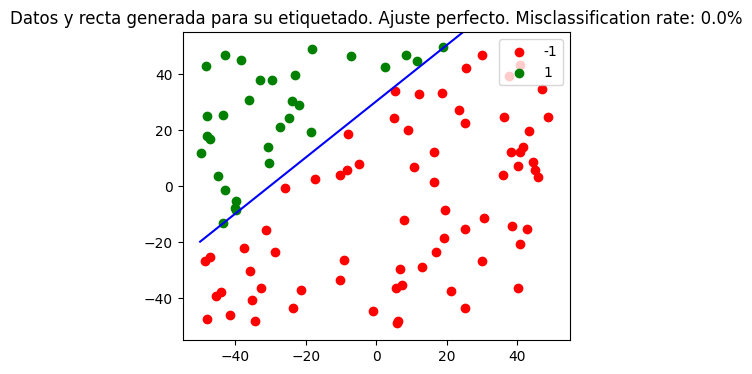

In [82]:
# Asigno una etiqueta a cada punto con f()
etiquetas = np.zeros(N)
for i in range(N):
  etiquetas[i] = f(muestra[i, 0], muestra[i, 1], a, b)
  
# Crear el vector x para la recta
x_recta = np.linspace(intervalo[0], intervalo[1], num=100)

# Calcular los valores de y para la recta
y_recta = a * x_recta + b

# Divido los puntos en base a la etiqueta que les corresponde y los dibujo
rojos = etiquetas == -1
verdes = etiquetas == 1

# Calculo el error de clasificación y lo muestro por pantalla
error = error_clasificacion(etiquetas, etiquetas)
print("Misclassification: ", error, "%")

# Dibujo los puntos de la muestra y la recta que los clasifica
plt.figure(figsize=(5, 4))
plt.scatter(muestra[rojos, 0], muestra[rojos, 1], c='red', label="-1")
plt.scatter(muestra[verdes, 0], muestra[verdes, 1], c='green', label="1")
plt.plot(x_recta, y_recta, color="blue")
# Añado leyenda y título
plt.legend(loc = 'upper right')
plt.title("Datos y recta generada para su etiquetado. Ajuste perfecto. Misclassification rate: 0.0%")
plt.xlim(intervalo[0]-5, intervalo[1]+5)
plt.ylim(intervalo[0]-5, intervalo[1]+5)
plt.show()

#### <font color='blue'>b) (0.5 puntos)  Introducción de ruido. 
Modifique de forma aleatoria un 10\% de las etiquetas positivas y otro
10\% de las negativas y guarde los puntos con sus nuevas etiquetas. Dibuje de nuevo
la gráfica anterior. Ahora habrá puntos mal clasificados respecto de la recta.</font>


Misclassification:  9.0 %


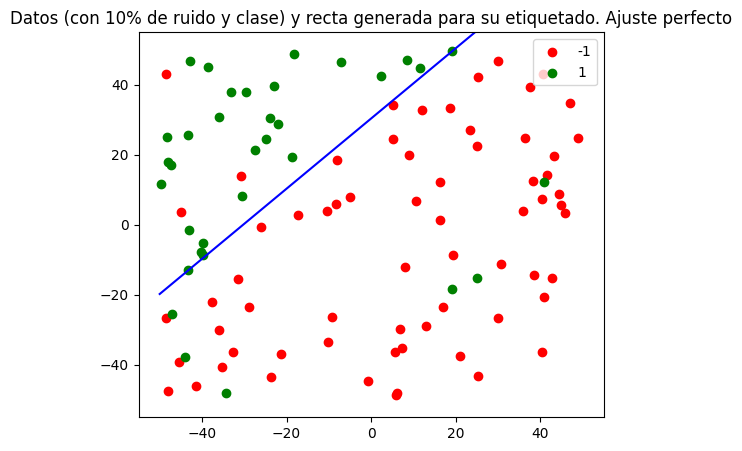

In [83]:
# Defino una función para introducir ruido que usaré a lo largo de la práctica
def introducir_ruido(etiquetas, porcentaje):
    etiquetas_mod = etiquetas.copy()
    # Guardo las posiciones de cada elemento dependiendo de su etiqueta
    pos_indices = np.where(etiquetas_mod == 1)[0]
    neg_indices = np.where(etiquetas_mod == -1)[0]
    # Calculo el numero de etiquetas a intercambiar multiplicando por el porcentaje
    num_pos_modificar = int((len(pos_indices)) * porcentaje )
    num_neg_modificar = int((len(neg_indices)) * porcentaje )
    # Calculo las posiciones a intercambiar para que sean elementos aleatorios
    pos_indices_modificar = np.random.choice(pos_indices, num_pos_modificar, replace=False)
    neg_indices_modificar = np.random.choice(neg_indices, num_neg_modificar, replace=False)
    # Finalmente modifico las etiquetas
    etiquetas_mod[pos_indices_modificar] = -1
    etiquetas_mod[neg_indices_modificar] = 1
    
    return etiquetas_mod


# Introduzco ruido en la muestra
etiquetas_modificadas = introducir_ruido(etiquetas, 0.1)

# Asigno etiquetas predichas a los puntos según la posición respecto a la recta
etiquetas_predichas = np.zeros(N)
for i in range(N):
    etiquetas_predichas[i] = f(muestra[i, 0], muestra[i, 1], a, b)

# Calculo el error de clasificación y lo muestro por pantalla
error = error_clasificacion(etiquetas_modificadas, etiquetas_predichas)
print("Misclassification: ", error, "%")

# Crear el vector x para la recta
x_recta = np.linspace(intervalo[0], intervalo[1], num=100)

# Calcular los valores de y para la recta
y_recta = a * x_recta + b

# Divido los puntos en base a la etiqueta que les corresponde y los dibujo
rojos = etiquetas_modificadas == -1
verdes = etiquetas_modificadas == 1

# Dibujo la muestra de puntos y la recta que los clasifica
plt.figure(figsize=(6, 5))
plt.scatter(muestra[rojos, 0], muestra[rojos, 1], c='red', label="-1")
plt.scatter(muestra[verdes, 0], muestra[verdes, 1], c='green', label="1")
plt.plot(x_recta, y_recta, color="blue")
# Añado leyenda, titulo y los límites que dibja para mayor claridad
plt.legend(loc = 'upper right')
plt.title("Datos (con 10% de ruido y clase) y recta generada para su etiquetado. Ajuste perfecto")
plt.xlim(intervalo[0]-5, intervalo[1]+5)
plt.ylim(intervalo[0]-5, intervalo[1]+5)
plt.show()


Obtenemos un error de clasificación del 9% cuando debería ser un 10% debido a que estamos trabajando con variables enteras. En la función *introducir_ruido* calculo el numero de etiquetas a intercambiar multiplicando por el porcentaje, y convierto el resultado en una variaible entera, lo que puede provocar que los decimales se vean ignorados. 

#### <font color='blue'>c) (2.5 puntos)  Análisis y comparación de distintas fronteras de decisión. 
Supongamos ahora que las siguientes funciones definen la frontera de
clasificación de los puntos de la muestra en lugar de una recta.</font>

<font color='blue'>$f_1(x, y) = (x - 10)^2 + (y - 20)^2 - 400$</font>

<font color='blue'>$f_2(x, y) = 0.5(x + 10)^2 + (y - 20)^2 - 400$</font>

<font color='blue'>$f_3(x, y) = 0.5(x - 10)^2 - (y + 20)^2 - 400$</font>

<font color='blue'>$f_4(x, y) = y - 20x^2 - 5x + 3$</font>


<font color='blue'>

Visualizar el etiquetado generado en el Apartado (b) junto con la gráfica de cada
una de las funciones. Muéstrense los porcentajes de acierto en clasificación para las funciones (es decir, fronteras de decisión) evaluadas. Argumente si estas funciones más
complejas son mejores clasificadores que la función lineal. Observe las gráficas y diga
qué consecuencias extrae sobre la influencia de la modificación de etiquetas
en el proceso de aprendizaje. En concreto, razone sobre cuestiones como las siguientes: ¿Necesariamente funciones más complejas son mejores clasificadores (es decir, representan “mejores” bordes de decisión)? ¿Es posible superar/mejorar ese 10% de error de clasificación? ¿Qué pasa si repetimos el proceso con estas funciones más complejas (las empleamos para etiquetar los datos y luego metemos un 10% de ruido)? ¿Qué error de clasificación tenemos? ¿Es menor que ese 10%?
</font>



In [84]:
"""
Esta función permite visualizar las fronteras de decisión.

Entradas: 
- X: datos de entrada con tantas filas como ejemplos, y tantas columnas como dimensiones/features
- y: etiquetas
- fz: función que define la frontera de decisión
- title: título que se le quiere poner a la figura
- xaxis: nombre que se le quiere poner al eje X
- yaxis: nombre que se le quiere poner al eje Y

Salida: visualización de los datos junto con la frontera de decisión proporcionada

Ejemplo de uso: 
def f_prueba(X):
	return X[:,0]**2 + X[:,1]**2 - 200
plot_datos_cuad(X, y, f_prueba, title=r'$f_{prueba}(x, y) = x^2 + y^2 - 200$')
"""
def plot_datos_cuad(X, y, fz, title='Point cloud plot', xaxis='x axis', yaxis='y axis'):
    #Preparar datos
    min_xy = X.min(axis=0)
    max_xy = X.max(axis=0)
    border_xy = (max_xy-min_xy)*0.01
    
    #Generar grid de predicciones
    # np.mgrid es una versión multidimensional de meshgrid (https://numpy.org/doc/stable/reference/generated/numpy.mgrid.html)
    xx, yy = np.mgrid[min_xy[0]-border_xy[0]:max_xy[0]+border_xy[0]+0.001:border_xy[0], 
                      min_xy[1]-border_xy[1]:max_xy[1]+border_xy[1]+0.001:border_xy[1]]
    # np.ravel "aplana" un array (https://numpy.org/doc/stable/reference/generated/numpy.ravel.html)
    # Diferencias entre ravel y flatten: https://stackoverflow.com/questions/28930465/what-is-the-difference-between-flatten-and-ravel-functions-in-numpy
    # np.c_ permite concatenar arrays a lo largo del segundo eje (https://numpy.org/doc/stable/reference/generated/numpy.c_.html)
    grid = np.c_[xx.ravel(), yy.ravel(), np.ones_like(xx).ravel()]
    pred_y = np.sign(fz(grid)).reshape(xx.shape)
    
    #Plot
    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, pred_y, 50, cmap='RdBu',vmin=-1, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label('$f(x, y)$')
    ax_c.set_ticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, linewidth=1, 
                cmap="RdYlBu", edgecolor='white')
    
    XX, YY = np.meshgrid(np.linspace(round(min(min_xy)), round(max(max_xy)),X.shape[0]),np.linspace(round(min(min_xy)), round(max(max_xy)),X.shape[0]))
    positions = np.vstack([XX.ravel(), YY.ravel()])
    # ax.contour(XX,YY,fz(positions.T).reshape(X.shape[0],X.shape[0]),[0], colors='white')
    
    ax.set(
       xlim=(min_xy[0]-border_xy[0], max_xy[0]+border_xy[0]), 
       ylim=(min_xy[1]-border_xy[1], max_xy[1]+border_xy[1]),
       xlabel=xaxis, ylabel=yaxis)
    plt.title(title)
    plt.show()

In [85]:
def f1(X):
    x = X[:, 0]
    y = X[:, 1]
    return (x - 10)**2 + (y - 20)**2 - 400

# Definir la función f2
def f2(X):
    x = X[:, 0]
    y = X[:, 1]
    return 0.5 * (x + 10)**2 + (y - 20)**2 - 400

# Definir la función f3
def f3(X):
    x = X[:, 0]
    y = X[:, 1]
    return 0.5 * (x - 10)**2 - (y + 20)**2 - 400

# Definir la función f4
def f4(X):
    x = X[:, 0]
    y = X[:, 1]
    return y - 20 * x**2 - 5 * x + 3

Misclassification: 54.0 %


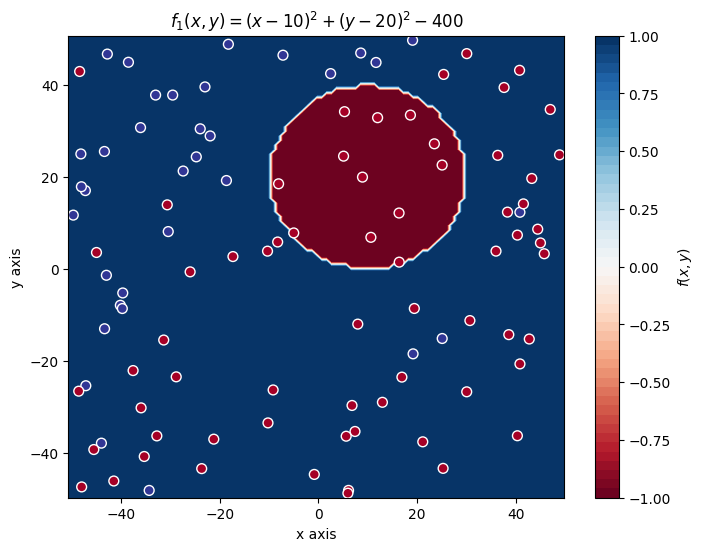

Misclassification: 62.0 %


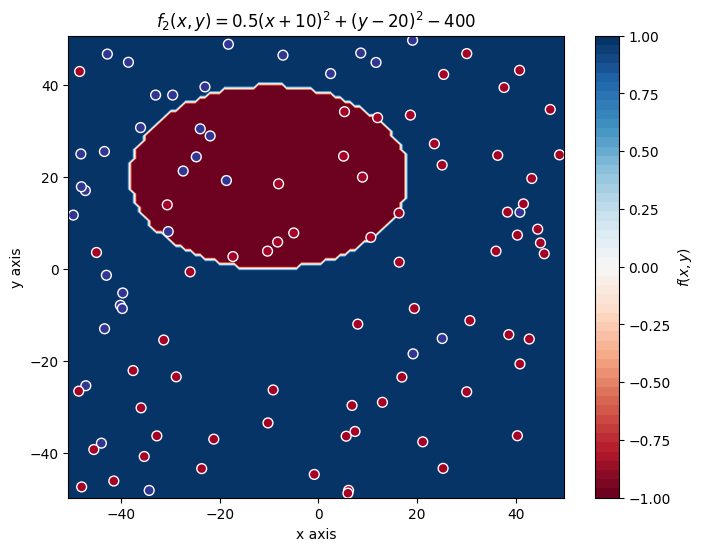

Misclassification: 39.0 %


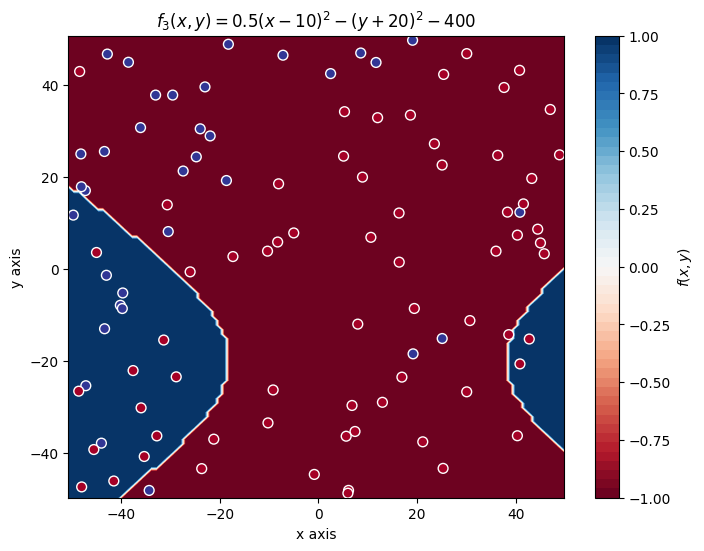

Misclassification: 34.0 %


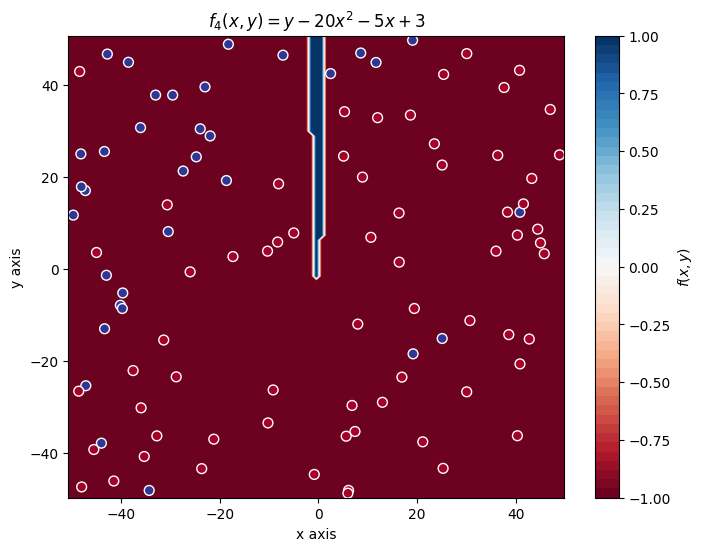

In [86]:
# Función para calcular las etiquetas teóricas usando una función de frontera de decisión
def calcular_etiquetas_teoricas(muestra, funcion_decision):
    return np.sign(funcion_decision(muestra))

# Declaro las funciones de decisión y los títulos que mostraré en cada gráfica
funciones = [f1, f2, f3, f4]
titulos = [
    r'$f_1(x, y) = (x - 10)^2 + (y - 20)^2 - 400$',
    r'$f_2(x, y) = 0.5(x + 10)^2 + (y - 20)^2 - 400$',
    r'$f_3(x, y) = 0.5(x - 10)^2 - (y + 20)^2 - 400$',
    r'$f_4(x, y) = y - 20x^2 - 5x + 3$'
]

for funcion, titulo in zip(funciones, titulos):
    # Calcular las etiquetas teóricas
    etiquetas_teoricas = calcular_etiquetas_teoricas(muestra, funcion)

    # Calcular el error de clasificación
    error = error_clasificacion(etiquetas_modificadas, etiquetas_teoricas)
    print("Misclassification:", error, "%")

    # Visualizar datos y función de decisión
    plot_datos_cuad(muestra, etiquetas_modificadas, funcion, title=titulo)


Como podemos obsevar en las gráficas, las funciones más complejas no necesariamente son mejores clasificadores que las funciones lineales. Aunque estas funciones más complejas pueden tener una mejor capacidad para ajustarse a datos no lineales, esto no garantiza una mayor precisión en la clasificación. La calidad de un clasificador depende en gran medida de la naturaleza de los datos y de cómo se distribuyen. En algunos casos, un clasificador lineal podría ser suficiente, mientras que en otros casos, se necesitaría un clasificador más complejo.

En cuanto a la influencia de la modificación de etiquetas en el proceso de aprendizaje, la introducción de un 10% de ruido en las etiquetas puede tener un impacto significativo en la precisión de la clasificación. Una función más compleja puede ajustarse mejor a una muestra de entrenamiento puesto que puede llegar a clasificar bien los elementos del ruidoo introducido pero cuando modifiquemos la muestra y estos elementos cambien, esta mejora desaparecerá y obtendremos peores resultados. Esto se debe a que las funciones más complejas son más propensas al sobreajuste, es decir, se ajustan demasiado bien a los datos de entrenamiento, incluidos los puntos mal etiquetados, lo que puede resultar en un rendimiento más pobre en datos no vistos o en la clasificación de puntos que no tienen ruido en sus etiquetas.

En resumen, las funciones más complejas no siempre son mejores clasificadores. Es crucial elegir un clasificador adecuado en función de la naturaleza de los datos.

## <font color='blue'>Ejercicio 2: MODELOS LINEALES (8 puntos) </font>

### <font color='blue'>Apartado 2.1 (3 puntos) Algoritmo Perceptrón (PLA). 

<font color='blue'>Implementar la función $ajusta\_PLA(datos, label, max\_iter, vini)$ que calcula el hiperplano solución a un problema de clasificación binaria usando el algoritmo PLA. La entrada $datos$ es una matriz donde cada ejemplo está representado por una fila de la matriz, $label$ el vector de etiquetas (cada etiqueta es
un valor +1 o -1), $max\_iter$ es el número máximo de iteraciones permitidas y $vini$
el valor inicial del vector. La función devuelve, como mínimo, los coeficientes del hiperplano y la iteración de convergencia.  </font>



In [87]:
def ajusta_PLA(datos, label, max_iter, vini):
    puntos = datos.shape[0]
    w = vini
    it = 0

    X = np.hstack((datos, np.ones((puntos, 1))))
    while it < max_iter:
        # Calculo predicciones
        etiquetas_actuales = np.sign(np.dot(X, w))

        # Calculo cuantos elementos hay mal clasificados
        error = np.where(label != etiquetas_actuales)[0]

        # Si no hay puntos mal clasificados, salimos del bucle
        if len(error) == 0:
            break

        # Escojo un punto aleatorio entre los mal clasificados
        idx = np.random.choice(error)

        # Actualizo el vector de pesos
        w += label[idx] * X[idx]
        it += 1

    return w, it


<font color='blue'>Ejecutar el algoritmo PLA con los datos empleados en el Apartado (a) del Ejercicio 1. Inicializar el algoritmo con: 

<font color='blue'>i) el vector cero y, 

<font color='blue'>ii) con vectores de
números aleatorios en [0, 1] (10 veces). 

<font color='blue'>Anotar el número medio de iteraciones
necesarias en ambos para converger. Se deben mostrar en una tabla cada uno de los pesos iniciales empleados, los finales (obtenidos tras el proceso de entrenamiento), y el porcentaje de error de clasificación. También se debe visualizar una nube de puntos etiquetada junto con la frontera resultante del ajuste. Valorar el resultado relacionando el punto
de inicio con el número de iteraciones. </font>

                                      Pesos iniciales  \
0                                     [0.0, 0.0, 0.0]   
1   [-44.1810348041046, 44.45793676740867, -1297.7...   
2   [-35.664620637807424, 35.64893779914219, -1074...   
3   [-48.11010749844903, 45.32698292011243, -1325....   
4   [-39.95379422485425, 38.022366285505896, -1100...   
5   [-37.59477410189762, 37.09039272306274, -1106....   
6   [-30.490157805627234, 30.37226312730992, -897....   
7   [-53.515694604452435, 50.84748782693157, -1503...   
8   [-30.560563462650123, 28.485625405603656, -818...   
9   [-26.860130809646655, 27.195267635758427, -793...   
10  [-41.993560066379, 40.83756291454647, -1198.03...   

                                        Pesos finales  Iteraciones  \
0    [-17.261638238884387, 67.91728382049774, -688.0]         1000   
1   [-44.1810348041046, 44.45793676740867, -1297.7...         2406   
2   [-35.664620637807424, 35.64893779914219, -1074...         1835   
3   [-48.11010749844903, 45.3269829

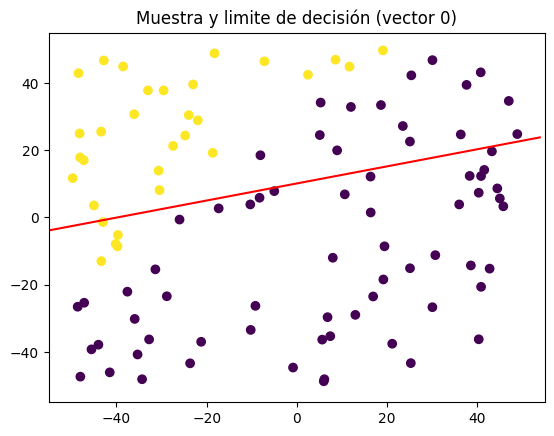

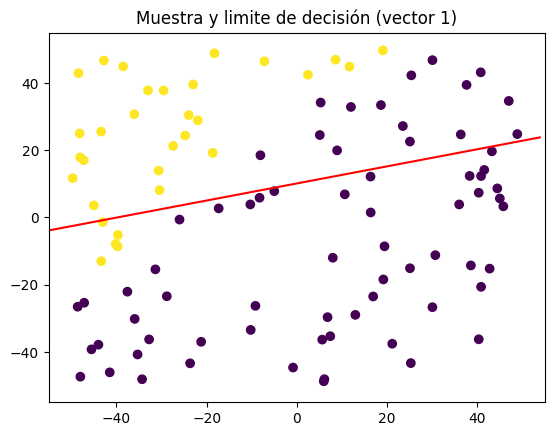

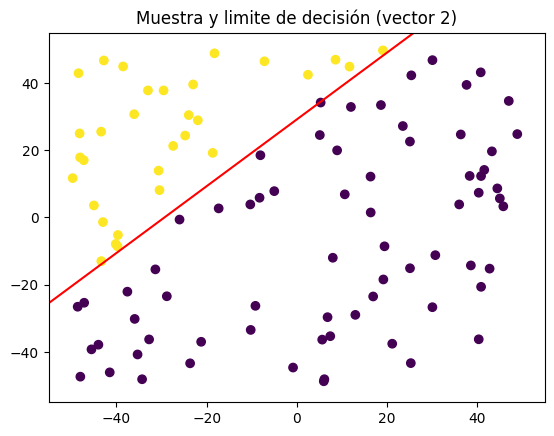

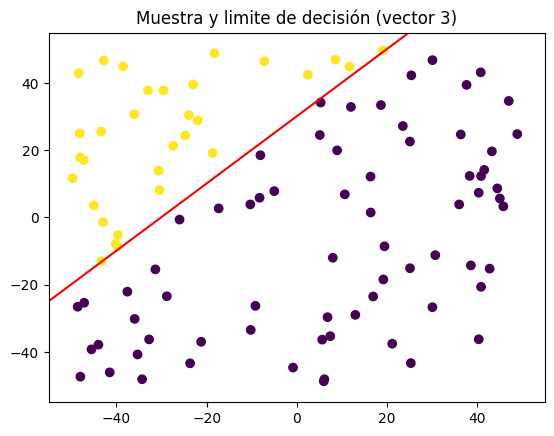

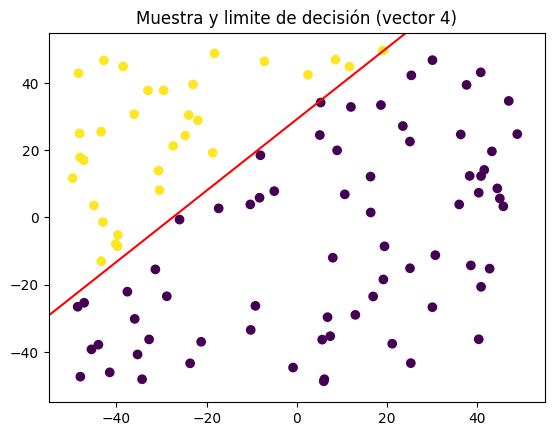

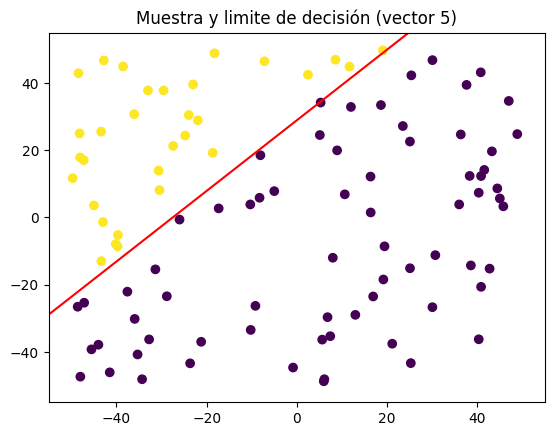

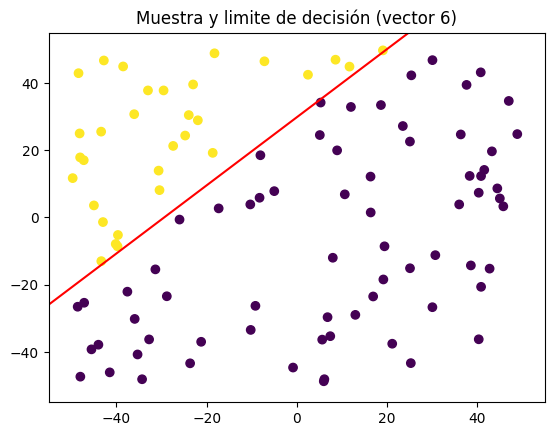

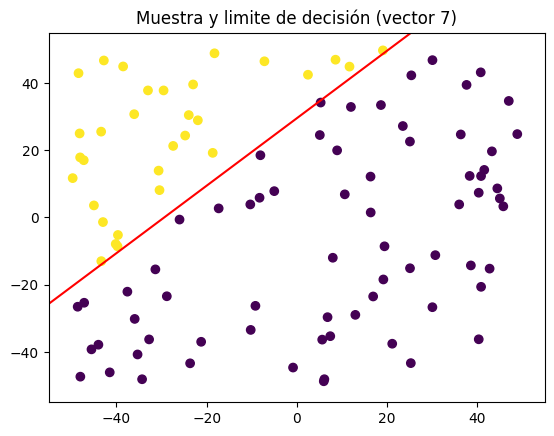

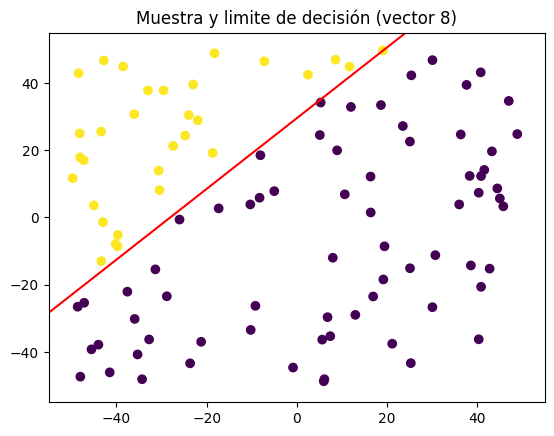

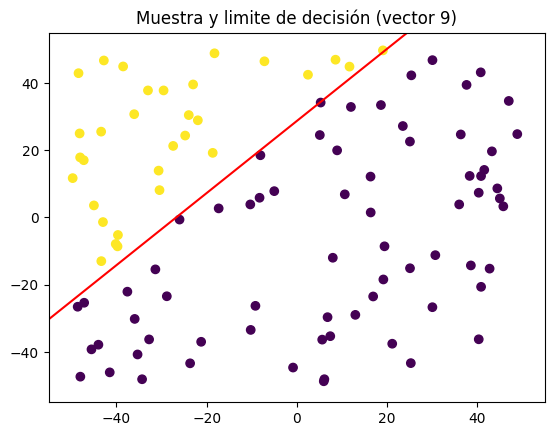

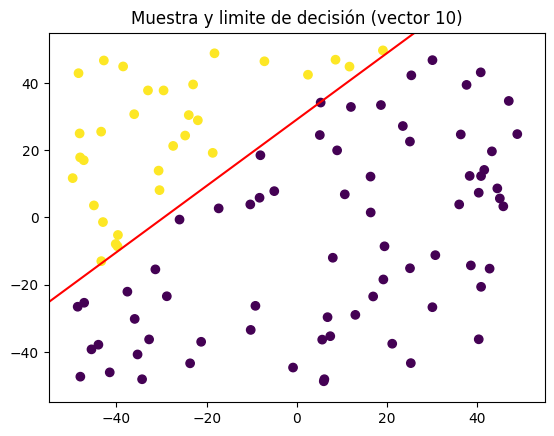

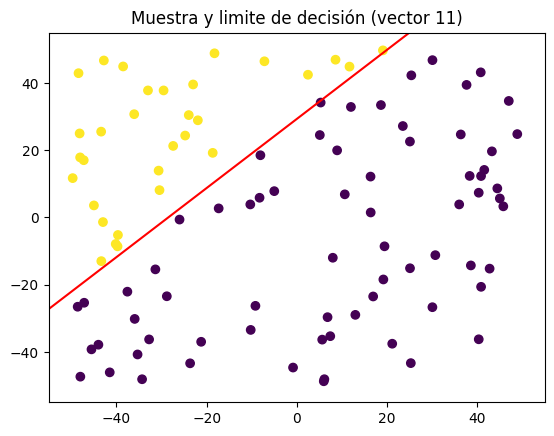

In [88]:
# Función para visualizar la nube de puntos y la frontera de decisión
def dibuja_grafica(X, y, w, titulo):
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    x = np.linspace(np.min(X[:, 0])-5, np.max(X[:, 0])+5, 100)
    y_boundary = (-w[0] * x - w[2]) / w[1]
    plt.plot(x, y_boundary, c='red')
    plt.title(titulo)
    plt.xlim(intervalo[0]-5, intervalo[1]+5)
    plt.ylim(intervalo[0]-5, intervalo[1]+5)
    plt.show()

# Caso i) - Vector cero
w_cero, it_cero = ajusta_PLA(muestra, etiquetas, 1000, np.zeros(3))

# Caso ii) - Vectores aleatorios
vectores = [np.random.rand(3) for _ in range(10)]

# Inicializar listas para guardar resultados
pesos_iniciales = []
pesos_finales = []
iteraciones = []
error = []

# Agrego los resultados al ejecutar con vector inicial de ceros
pesos_iniciales.append(np.zeros(3))
pesos_finales.append(w_cero)
iteraciones.append(it_cero)
pred_etiquetas = np.sign(np.dot(np.hstack((muestra, np.ones((len(muestra), 1)))), w_cero))
error.append(error_clasificacion(etiquetas, pred_etiquetas))

# Ejecutar PLA con vectores aleatorios y guardar resultados
for random_vector in vectores:
    w, it = ajusta_PLA(muestra, etiquetas, 10000, random_vector)
    pesos_iniciales.append(random_vector)
    pesos_finales.append(w)
    iteraciones.append(it)
    pred_etiquetas = np.sign(np.dot(np.hstack((muestra, np.ones((len(muestra), 1)))), w))
    error.append(error_clasificacion(etiquetas, pred_etiquetas))

# Mostrar resultados en una tabla
resultados = pd.DataFrame({'Pesos iniciales': pesos_iniciales,
                        'Pesos finales': pesos_finales,
                        'Iteraciones': iteraciones,
                        'Classification error (%)': error})
print(resultados)

# Visualizar la nube de puntos y la frontera de decisión para el vector cero
dibuja_grafica(muestra, etiquetas, w_cero, 'Muestra y limite de decisión (vector 0)')

# Visualizar la nube de puntos y la frontera de decisión para cada vector aleatorio
for i, w in enumerate(pesos_finales):
    dibuja_grafica(muestra, etiquetas, w, f'Muestra y limite de decisión (vector {i + 1})')


<font color='blue'>Ahora, hay que hacer lo mismo usando  los datos del Apartado (b) del Ejercicio 1, y $150.000$ como número máximo de iteraciones. ¿Se observa algún comportamiento diferente? En caso afirmativo, diga cuál y las
razones para que ello ocurra. </font>

                                      Pesos iniciales  \
0                                     [0.0, 0.0, 0.0]   
1   [-14.058893769268302, 55.27674152481327, -795....   
2   [26.156459269647236, 20.55417362676195, -798.7...   
3   [5.291928881049039, 63.819797137530756, -819.6...   
4   [-55.805385829322894, 24.84442042505681, -834....   
5   [-66.71962775455432, 31.031512214683858, -816....   
6   [-1.1327700543418047, 60.00416301410369, -783....   
7   [-6.441220449447179, 14.103398751432593, -831....   
8   [-29.790776917776213, 64.85209288549765, -850....   
9   [-8.360284345766843, 65.15982261674424, -799.2...   
10  [-30.733454905400947, 35.24669882809951, -812....   

                                        Pesos finales  Iteraciones  \
0     [-32.70252294085406, 36.02381893722255, -836.0]       150000   
1   [-14.058893769268302, 55.27674152481327, -795....       150000   
2   [26.156459269647236, 20.55417362676195, -798.7...       150000   
3   [5.291928881049039, 63.81979713

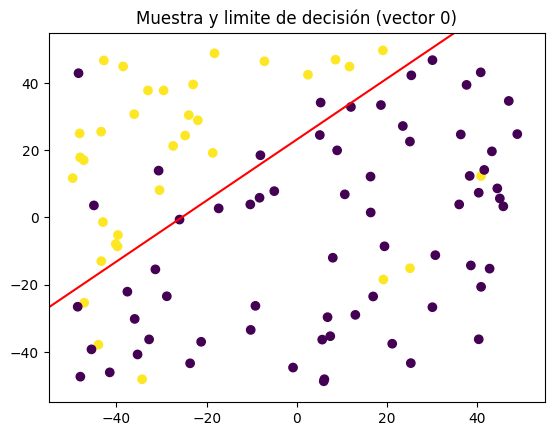

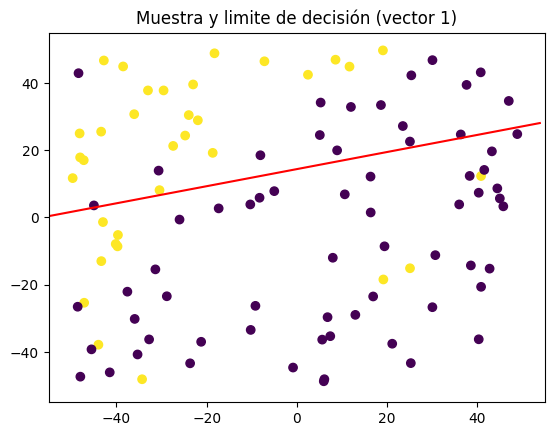

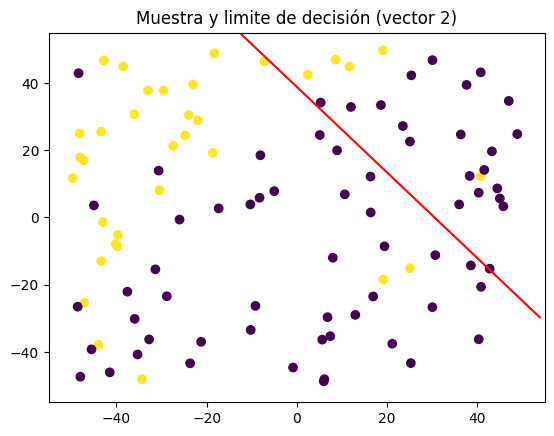

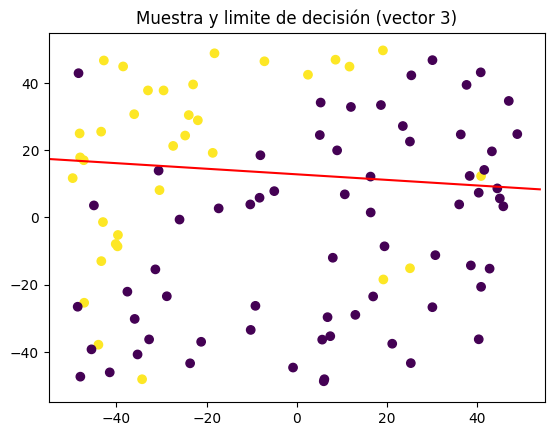

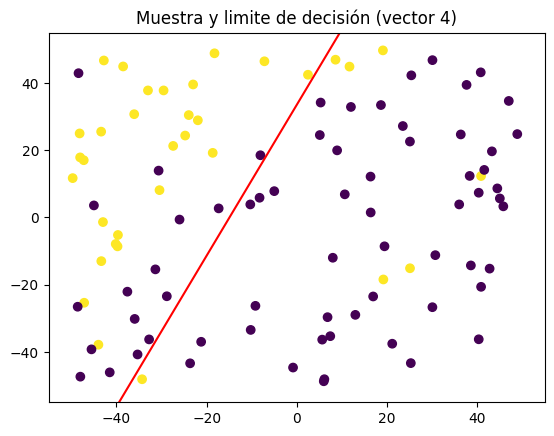

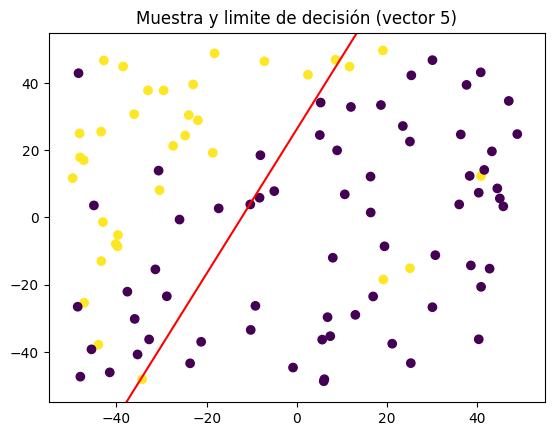

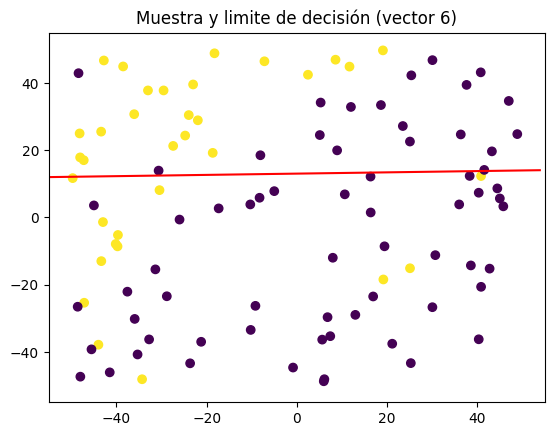

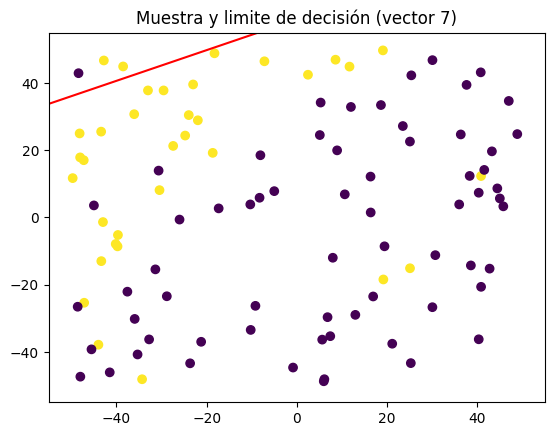

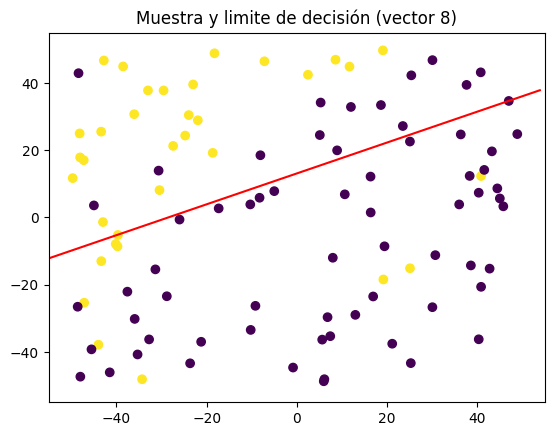

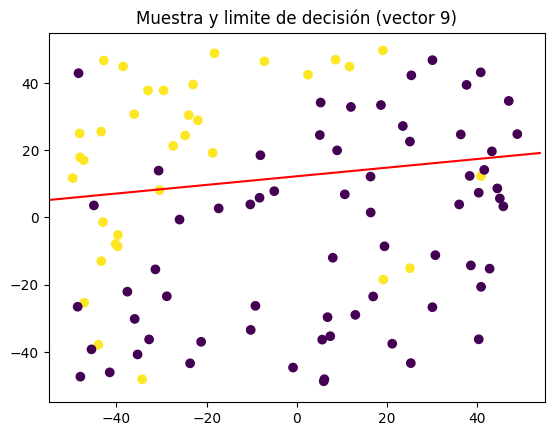

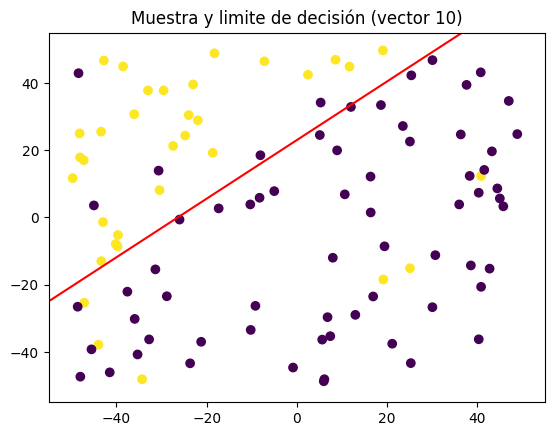

In [89]:
# Utilizo los vectores iniciales creados anteriormente
# Inicializo listas para guardar resultados
pesos_iniciales2 = []
pesos_finales2 = []
iteraciones2 = []
error2 = []

# Ejecuto PLA con el vector inicial de ceros
w_cero, it_cero = ajusta_PLA(muestra, etiquetas_modificadas, 150000, np.zeros(3))

# Agrego los resultados al ejecutar con vector inicial de ceros
pesos_iniciales2.append(np.zeros(3))
pesos_finales2.append(w_cero)
iteraciones2.append(it_cero)
pred_etiquetas = np.sign(np.dot(np.hstack((muestra, np.ones((len(muestra), 1)))), w_cero))
error2.append(error_clasificacion(etiquetas_modificadas, pred_etiquetas))

# Ejecutar PLA con vectores aleatorios y guardar resultados
for random_vector in vectores:
    w, it = ajusta_PLA(muestra, etiquetas_modificadas, 150000, random_vector)
    pesos_iniciales2.append(random_vector)
    pesos_finales2.append(w)
    iteraciones2.append(it)
    pred_labels = np.sign(np.dot(np.hstack((muestra, np.ones((len(muestra), 1)))), w))
    error2.append(error_clasificacion(etiquetas_modificadas, pred_labels))

# Mostrar resultados en una tabla
results = pd.DataFrame({'Pesos iniciales': pesos_iniciales2,
                        'Pesos finales': pesos_finales2,
                        'Iteraciones': iteraciones2,
                        'Error de clasificacion (%)': error2})
print(results)

# Visualizar la nube de puntos y la frontera de decisión para cada vector 
for i, w in enumerate(pesos_finales2):
    dibuja_grafica(muestra, etiquetas_modificadas, w, f'Muestra y limite de decisión (vector {i})')


Para analizar los resultados obtenidos hay que tener en cuenta que en el primer experimento los datos son linealmente separables mientras que en el segundo hay ruido en la muestra. Esto repercute directamente en el comportamiento de nuestro algoritmo pues, como era de esperar, en el primer ensayo el algoritmo Perceptrón encuentra rápidamente el hiperplano que divide los puntos sin error de clasificación (20-100 iteraciones). 

Por otro lado, en la segunda prueba sabemos que por más que lo intentemos es imposible separar los datos sin error con un modelo lineal debido al ruido en las etiquetas de la muestra. Al examinar los resultados obtenidos podemos concluir que sucede lo esperado, nuestro algoritmo nunca converge y finaliza siempre al llegar al número máximo de iteraciones indicado. Observando el error de clasificación obtenido vemos que se encuentra entre el 20% y el 50%, lo que nos puede llevar a pensar que hemos implementado mal el algoritmo puesto que sabemos que el ruido en la muestra es de un 10% pero estaríamos equivocados. Esto se debe a que el algoritmo de Perceptrón no está diseñado para minimizar dicho error puesto que al modificar los pesos del hiperplano a calcular, no tiene en cuenta si dicha modificación mejora la solución.

### <font color='blue'>Apartado 2.2 (5 puntos) Regresión Logística (RL). 


<font color='blue'>En este ejercicio emplearemos nuestra propia función
objetivo $f$ y un conjunto de datos $\mathcal{D}$ para ver cómo
funciona regresión logística. Consideraremos $d = 2$ para que los datos sean fácilmente visualizables, y emplearemos $\mathcal{X} = [0, 2] \times [0, 2]$ con
probabilidad uniforme de elegir cada $x \in \mathcal{X}$. Elegir una línea en el plano que pase por
$\mathcal{X}$ como la frontera que separa la región en donde $y$ toma valores +1 y -1. Para ello, seleccionar dos puntos aleatorios de $\mathcal{X}$ y calcular la línea
que pasa por ambos. 

<font color='blue'>Impleméntese RL con Gradiente Descendente Estocástico (SGD) del siguiente modo:

> <font color='blue'>1) Inicializar el vector de pesos con valores 0.

> <font color='blue'>2) Parar el algoritmo cuando $\|w^{(t+1)} - w^{(t)}\| < 0.01$, donde $w(t)$ denota el vector
de pesos al final de la época $t$. Recuérdese que una época es un pase completo a través de los $N$
ejemplos de nuestro conjunto de datos.

> <font color='blue'>3) Aplicar una permutación aleatoria de $\{1, 2,..., N\}$ a los índices de los datos, antes
de usarlos en cada época del algoritmo.

</font>


In [90]:
def funcion_decision(x1, x2, w):
    return np.sign(w[0]*x1 + w[1]*x2 + w[2])

def sgd_rl(X, y, lr, max_epocas, tam_batch):
    N = len(y)
    w = np.zeros(3)
    w_prev = np.zeros(3)

    for epoca in range(max_epocas):
        # Barajo los índices
        indices = np.random.permutation(N)

        # Actualizo los pesos con gradiente descendente estocástico usando el minibatch
        for start in range(0, N, tam_batch):
            end = start + tam_batch
            gradiente = np.zeros(3)

            for i in indices[start:end]:
                x = X[i]
                y_actual = y[i]
                gradiente += -y_actual * x / (1 + np.exp(y_actual * np.dot(w, x)))

            w -= lr * gradiente / (end - start)

        # Verificar la convergencia para salir del bucle en caso positivo
        if np.linalg.norm(w - w_prev) < 0.01:
            break

        # Actualizar los pesos anteriores
        w_prev = w.copy()

    return w, epoca + 1


<font color='blue'>A continuación, empleando la implementación anterior, realícese el siguiente experimento:
 
> <font color='blue'>1) Seleccione $N = 100$ puntos aleatorios $\{{\bf x}_n \}$ de $\mathcal{X}$ y evalúe las
respuestas $\{y_n\}$ de todos ellos respecto de la frontera elegida. 

> <font color='blue'>2) Ejecute RL para encontrar la función solución $g$. Visualice la frontera de decisión encontrada, y muestre el $E_{in}$ y el porcentaje de acierto en clasificación correspondientes. Se debe escoger experimentalmente tanto el $\textit{learning rate}$ (tasa de aprendizaje $\eta$) como el tamaño de batch. 

> <font color='blue'>3) Evalúe el error $E_{out}$ usando para ello una nueva muestra de datos ($>999$).  Muéstrense, de nuevo, tanto el ajuste visual, como el $E_{out}$ y el porcentaje de acierto en test. 

> <font color='blue'>4) Repita el experimento anterior (pasos 1-3) $50$ veces, y calcule los valores promedio de $E_{in}$ y $E_{out}$, de porcentaje de error de clasificación (en entrenamiento y test), y de épocas necesarias para converger (en entrenamiento).   

<font color='blue'>Junto con la realización del experimento anteriormente descrito, discuta qué ocurriría si, como criterio de parada, se emplease la diferencia entre pesos obtenidos en sucesivas iteraciones (en lugar de en sucesivas épocas). Del mismo modo, explique cómo ha escogido el $\textit{learning rate}$ y el $\textit{batch size}$, y las conclusiones que extrae al respecto (por ejemplo, ¿valores de $\textit{learning rate}$ como 0.001, cuando se emplea la diferencia de pesos entre épocas como criterio de terminación, funcionan adecuadamente y permiten resolver el problema?). 




In [91]:
#Función para calcular el error
def errorRL(x,y,w):
  return np.sum(np.log( 1+np.exp(-y.dot(x@w.T)) ) )/len(x)

In [92]:
num_iteraciones = 50

Ein_promedio = 0
Eout_promedio = 0
MCin_promedio = 0
MCout_promedio = 0
epocas_promedio = 0

for _ in range(num_iteraciones):
    # Genero 100 puntos aleatorios y genero las etiquetas respecto de la frontera elegida.
    N = 100
    X = simula_unif(N, 2, [0, 2])
    X = np.hstack((np.ones((N, 1)), X))  # Añado el término de sesgo a la muestra
    y = np.array([funcion_decision(x[1], x[2], [a, -1, b]) for x in X])

    # Ejecuto sgd_RL para encontrar la función solución y calcular Ein.
    w, epocas = sgd_rl(X, y, 0.01, 100000, 16)
    pred_y = np.array([funcion_decision(x[1], x[2], w) for x in X])
    MCin = error_clasificacion(y, pred_y)
    Ein = errorRL(X, y, w)

    # Evaluo el error Eout usando una nueva muestra de datos.
    N_test = 1000
    X_test = simula_unif(N_test, 2, [0, 2])
    X_test = np.hstack((np.ones((N_test, 1)), X_test))  # Añado el término de sesgo a la nueva muestra
    y_test = np.array([funcion_decision(x[1], x[2], [a, -1, b]) for x in X_test])
    pred_y_test = np.array([funcion_decision(x[1], x[2], w) for x in X_test])
    MCout = error_clasificacion(y_test, pred_y_test)
    Eout = errorRL(X, y, w)

    # Incremnto los valores promedio.
    MCin_promedio += MCin
    MCout_promedio += MCout
    Ein_promedio += Ein
    Eout_promedio += Eout
    epocas_promedio += epocas

# Calculo los promedios
MCin_promedio /= num_iteraciones
MCout_promedio /= num_iteraciones
Ein_promedio /= num_iteraciones
Eout_promedio /= num_iteraciones
epocas_promedio /= num_iteraciones

# Imprimo los resultados
print("MC_in promedio: ", MCin_promedio)
print("MC_out promedio: ", MCout_promedio)
print("E_in promedio: ", Ein_promedio)
print("E_out promedio: ", Eout_promedio)
print("Epocas promedio: ", epocas_promedio)

MC_in promedio:  0.0
MC_out promedio:  0.0
E_in promedio:  0.0
E_out promedio:  0.0
Epocas promedio:  60.92


En este experimento estamos utilizando la diferencia entre los pesos obtenidos en las iteraciones en lugar de en las épocas como criterio de parada, lo que afecta a la convergencia del algoritmo y el tiempo que tarda en alcanzarla. Esto se debe a que en Gradiente Descendente Estocástico, una iteración consiste en actualizar los pesos con un solo ejemplo de entrenamiento, mientras que en una época se actualizan los pesos con todos los ejemplos de entrenamiento. 

He elegido el learning rate experimentalmente probando con varios valores y finalmente he escogido un valor intermedio (0.01). Un learning rate más pequeño (0.001) puede funcionar adecuadamente cuando se emplea la diferencia de pesos entre épocas como criterio de parada, sin embargo, puede hacer que el algoritmo tarde más tiempo en converger, ya que los cambios en los pesos serán más pequeños en cada iteración. Por otro lado, un learning rate más grande puede hacer que el algoritmo converja más rápidamente, pero también puede provocar oscilaciones si es demasiado grande. 

Un learning rate más pequeño, como 0.001, puede funcionar adecuadamente cuando se emplea la diferencia de pesos entre épocas como criterio de parada. Sin embargo, este learning rate más pequeño puede hacer que el algoritmo de regresión logística tarde más tiempo en converger, ya que los cambios en los pesos serán más pequeños en cada iteración. Por otro lado, un learning rate más grande puede hacer que el algoritmo converja más rápidamente, pero también puede provocar oscilaciones o incluso divergencia si es demasiado grande. Es importante ajustar el learning rate adecuadamente para lograr un buen equilibrio entre la velocidad de convergencia y la estabilidad del algoritmo.

Respecto al tamaño de mini  batch, he escogido un tamaño igual a 16 puesto que al probar con varios tamaños, he comprobado que es el valor con el que el algoritmo necesita menos épocas para converger. Además, que dicho tamaño sea una potencia de dos es una ventaja a nivel computacional y de rendimiento debido a las operaciones internas.

En resumen, es fundamental explorar y ajustar los hiperparámetros, como el learning rate y el batch size, para encontrar la mejor combinación que permita un buen rendimiento en términos de error de clasificación y tiempo de entrenamiento. Además, es importante seleccionar un criterio de parada adecuado que permita una convergencia estable y no prematura del algoritmo.

<font color='blue'>Ahora repita el mismo experimento, pero empleando datos no linealmente separables. Para ello, debe introducirse un 10% de ruido por clase. 

In [93]:
np.random.seed(0)

num_iteraciones = 50

Ein_promedio = 0
Eout_promedio = 0
MCin_promedio = 0
MCout_promedio = 0
epocas_promedio = 0

for _ in range(num_iteraciones):
    # 1. Genero 100 puntos aleatorios y genero las etiquetas respecto de la frontera elegida
    N = 100
    X = simula_unif(N, 2, [0, 2])
    X = np.hstack((np.ones((N, 1)), X))  # Añado el término de sesgo a la muestra
    y = np.array([funcion_decision(x[1], x[2], [a, -1, b]) for x in X])
    # Introduzco ruido en las etiquetas
    y = introducir_ruido(y, 0.1)

    # 2. Ejecuto sgd_RL para encontrar la función solución y calcular Ein.
    w, epocas = sgd_rl(X, y, 0.01, 100000, 15)
    pred_y = np.array([funcion_decision(x[1], x[2], w) for x in X])
    MCin = error_clasificacion(y, pred_y)
    Ein = errorRL(X, y, w)

    # 3. Evaluo el error Eout usando una nueva muestra de datos.
    N_test = 1000
    X_test = simula_unif(N_test, 2, [0, 2])
    X_test = np.hstack((np.ones((N_test, 1)), X_test))  # Añado el término de sesgo a la nueva muestra
    y_test = np.array([funcion_decision(x[1], x[2], [a, -1, b]) for x in X_test])
    # Introduzco ruido en las etiquetas
    y_test = introducir_ruido(y_test, 0.1) 
    pred_y_test = np.array([funcion_decision(x[1], x[2], w) for x in X_test])
    MCout = error_clasificacion(y_test, pred_y_test)
    Eout = errorRL(X, y, w)

    # 4. Incremnto los valores promedio.
    MCin_promedio += MCin
    MCout_promedio += MCout
    Ein_promedio += Ein
    Eout_promedio += Eout
    epocas_promedio += epocas

# Calculo los promedios
MCin_promedio /= num_iteraciones
MCout_promedio /= num_iteraciones
Ein_promedio /= num_iteraciones
Eout_promedio /= num_iteraciones
epocas_promedio /= num_iteraciones

# Imprimo los resultados
print("MC_in promedio: ", MCin_promedio)
print("MC_out promedio: ", MCout_promedio)
print("E_in promedio: ", Ein_promedio)
print("E_out promedio: ", Eout_promedio)
print("Epocas promedio: ", epocas_promedio)

MC_in promedio:  10.0
MC_out promedio:  10.0
E_in promedio:  0.0
E_out promedio:  0.0
Epocas promedio:  39.02


En este caso obtenemos valores de error acordes al 10% de ruido introducido en la muestra pero utilizando un tercio de las épocas. Al trabajar con datos linealmente no separables la convergencia es más rápida porque el  algoritmo encuentra una solución que no separa perfectamente los datos pero que es lo suficientemente buena.



---

## <font color='blue'> Bonus (1.5 puntos). Clasificación de dígitos.

El BONUS solo se tendrá en cuenta si se ha obtenido al menos el 75\% de los puntos de la
parte obligatoria.</font>

<font color='blue'>Considerar el conjunto de datos de dígitos manuscritos, y seleccionar las muestras de los dígitos 4 y 8. Extraer las características de intensidad promedio y simetría en la manera que se indicó en la práctica anterior.
</font>

<font color='blue'> 1) Plantear un problema de clasificación binaria que considere el conjunto de entrenamiento
como datos de entrada para aprender la función $g$.

<font color='blue'> 2) Compárense los modelos de regresión lineal, PLA, RL y PLA-Pocket. 

> <font color='blue'> a) Generar gráficos separados de los datos de entrenamiento y test junto con
la función estimada.

> <font color='blue'> b) Calcular $E_{in}$ y $E_{test}$ (error sobre los datos de test).

> <font color='blue'> c) Si se emplean los pesos obtenidos con regresión lineal para inicializar los otros tres métodos (RL, PLA, PLA-pocket), ¿se observa alguna mejora en los resultados a algún nivel? Justifique su respuesta.

> <font color='blue'> d) Obtener cotas sobre el verdadero valor de $E_{out}$ para los cuatro métodos empleados. Calcúlense dos cotas: una
basada en $E_{in}$ y otra basada en $E_{test}$. Usar una tolerancia $\delta = 0.05$. ¿Qué cota es
mejor? Justifique la respuesta.  


In [94]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# La carpeta datos (que contiene X_train.npy, y_train.npy, X_test.npy y y_test.npy) 
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
# Funcion para leer los datos
def readData(file_x, file_y, class1, class2, label_class1, label_class2):
    # Leemos los ficheros    
    datax = np.load(file_x)
    datay = np.load(file_y)
    y = []
    x = []    
    # Solo guardamos los datos de las dos clases que nos interesan
    for i in range(0,datay.size):
        if datay[i] == class1 or datay[i] == class2:
            if datay[i] == class1:
                y.append(label_class1)
            else:
                y.append(label_class2)
            x.append(np.array([1, datax[i][0], datax[i][1]]))
            
    x = np.array(x, np.float64)
    y = np.array(y, np.float64)
    
    return x, y

In [96]:
class1 = 8 #dígito 8
class2 = 4 #dígito 4
label1 = 1 #etiqueta empleada para representar class1
label2 = -1 #etiqueta empleada para representar class2
# Lectura de los datos de entrenamiento 
x, y = readData('drive/MyDrive/Colab Notebooks/datos/X_train.npy', 
                'drive/MyDrive/Colab Notebooks/datos/y_train.npy', class1, class2, label1, label2)
# Lectura de los datos para el test
x_test, y_test = readData('drive/MyDrive/Colab Notebooks/datos/X_test.npy', 
                          'drive/MyDrive/Colab Notebooks/datos/y_test.npy', class1, class2, label1, label2)

In [97]:
def visualiza(X_train, y_train, X_test, y_test, w, title):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title(f'{title} - Entrenamiento')
    # Grafico los datos de entrenamiento
    pendiente = -w[1]/w[2]
    ordenada_origen = -w[0]/w[2]

    # Dibujo la línea que separa los conjuntos
    x_vals = np.array([np.min(x[:, 1]), np.max(x[:, 1])])
    print([np.min(x[:, 1]), np.max(x[:, 1])])
    y_vals = ordenada_origen + pendiente * x_vals
    plt.plot(x_vals, y_vals, color='black')
    plt.xlim([np.min(x[:, 1]), np.max(x[:, 1])])
    plt.ylim([np.min(x[:, 2]), np.max(x[:, 2])])
    # Divido los puntos en base a la etiqueta que les corresponde y los dibujo
    mask_blue = y == -1
    mask_red = y == 1
    plt.scatter(x[mask_blue, 1], x[mask_blue, 2], c='blue')
    plt.scatter(x[mask_red, 1], x[mask_red, 2], c='red')
    plt.legend(handles=[plt.scatter([],[], c='blue', label='4'), plt.scatter([],[], c='red', label='8')])

    plt.subplot(1, 2, 2)
    plt.title(f'{title} - Test')
    plt.plot(x_vals, y_vals, color='black')
    plt.xlim([np.min(x[:, 1]), np.max(x[:, 1])])
    plt.ylim([np.min(x[:, 2]), np.max(x[:, 2])])
    # Divido los puntos en base a la etiqueta que les corresponde y los dibujo
    mask_blue = y_test == -1
    mask_red = y_test == 1
    plt.scatter(x_test[mask_blue, 1], x_test[mask_blue, 2], c='blue')
    plt.scatter(x_test[mask_red, 1], x_test[mask_red, 2], c='red')
    plt.legend(handles=[plt.scatter([],[], c='blue', label='4'), plt.scatter([],[], c='red', label='8')])

    plt.show()


In [98]:
def ajusta_PLA_pocket(datos, label, max_iter, vini):
    puntos = datos.shape[0]
    w = vini
    w_pocket = w.copy()
    it = 0

    X = np.hstack((datos, np.ones((puntos, 1))))
    
    # Función para calcular el error de clasificación
    def error_clasificacion(w, X, y):
        pred_y = np.sign(np.dot(X, w))
        return np.mean(pred_y != y)
    
    # Calculamos el error inicial con w_pocket
    error_pocket = error_clasificacion(w_pocket, X, label)

    while it < max_iter:
        # Calculo predicciones
        etiquetas_actuales = np.sign(np.dot(X, w))

        # Calculo cuantos elementos hay mal clasificados
        error = np.where(label != etiquetas_actuales)[0]

        # Si no hay puntos mal clasificados, salimos del bucle
        if len(error) == 0:
            break

        # Escojo un punto aleatorio entre los mal clasificados
        idx = np.random.choice(error)

        # Actualizo el vector de pesos
        w += label[idx] * X[idx]

        # Calculamos el error de clasificación con el nuevo w
        error_actual = error_clasificacion(w, X, label)

        # Si el error actual es menor que el error de w_pocket, actualizamos w_pocket
        if error_actual < error_pocket:
            w_pocket = w.copy()
            error_pocket = error_actual

        it += 1

    return w_pocket, it


In [99]:
# Algoritmo pseudoinversa    
def pseudoinverse(x, y):
  # Calculo la matriz traspuesta de x
  x_trans = np.transpose(x)
  # Calculo la matriz inversa de Xt*X
  inversa = np.linalg.inv(np.dot(x_trans, x))
  # Calculo lamatriz pseudoinversa
  pseudoinversa = np.dot(inversa, x_trans)
  # Calculo los pesos de w multiplicando la pseudoinversa por el vector de etiquetas
  w = np.dot(pseudoinversa, y)

  return w

In [100]:
# Función para calcular el error
def error(x, y, w):
    predicciones = np.sign(x.dot(w))
    errores = (predicciones != y).astype(int)
    error_clasificacion = np.mean(errores)
    return error_clasificacion


[0.081591797, 0.63630273]


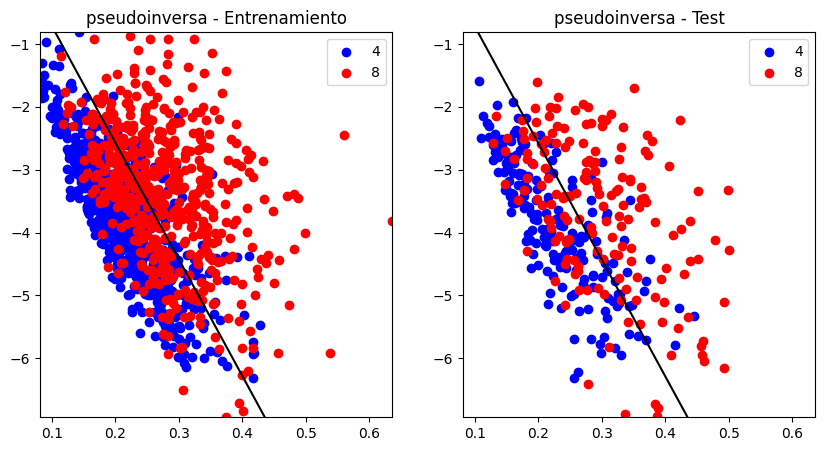

[0.081591797, 0.63630273]


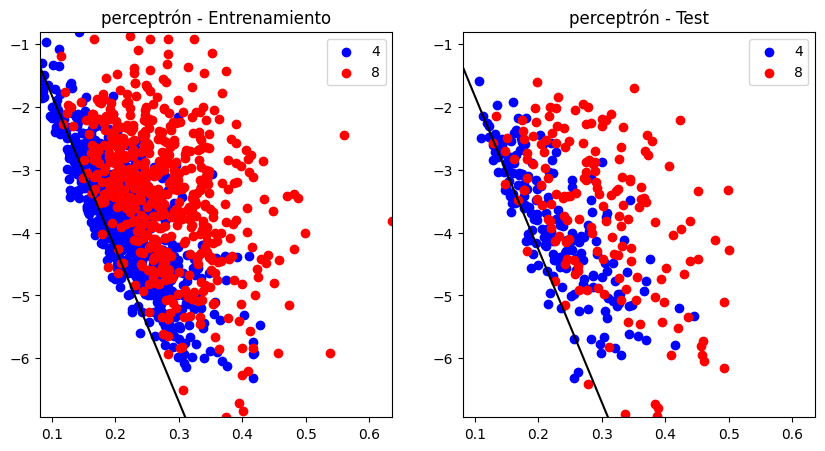

[0.081591797, 0.63630273]


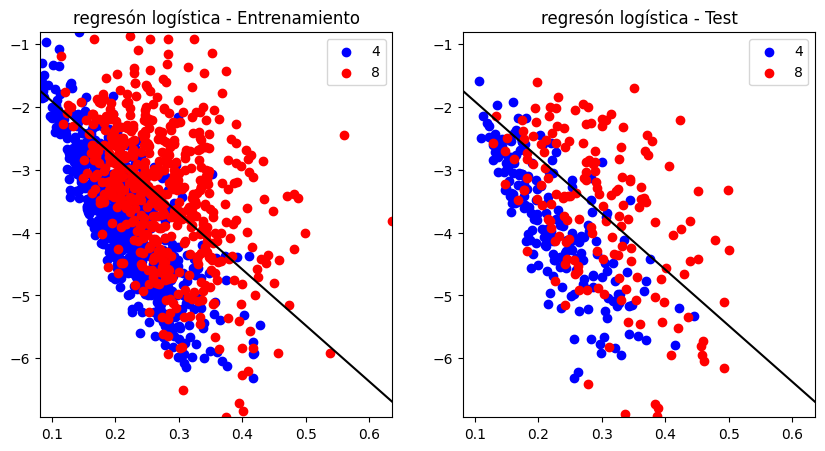

[0.081591797, 0.63630273]


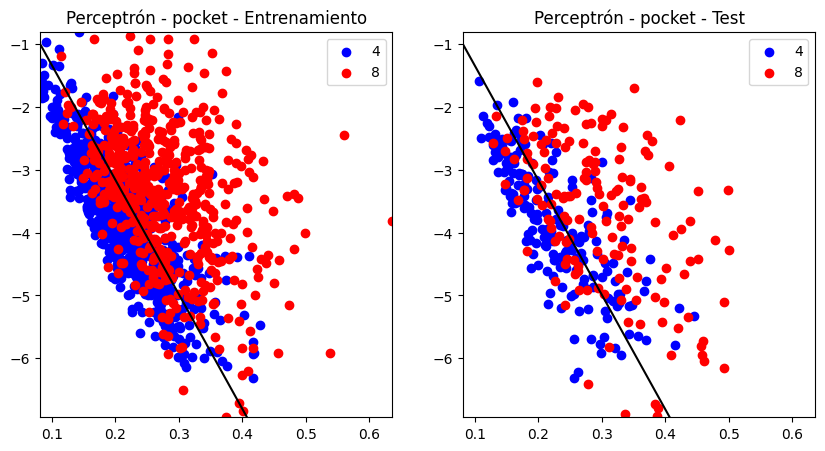

Resultados:

Método: Regresión lineal
Pesos: [-0.50676351  8.25119739  0.44464113]
Error de entrenamiento: 0.22780569514237856
Error de prueba: 0.25136612021857924

Método: Perceptrón
Pesos: [ -4.         157.75026517   6.4724375   -4.        ]
Error de entrenamiento: 0.3132328308207705
Error de prueba: 0.3551912568306011

Método: Regresión Logística
Pesos: [0.60751153 5.32436972 0.5967766 ]
Épocas: 448
Error de entrenamiento: 0.2613065326633166
Error de prueba: 0.3005464480874317

Método: Perceptrón -Pocket
Pesos: [ -4.         150.50841661   8.2563125   -4.        ]
Iteraciones: 100000
Error de entrenamiento: 0.2102177554438861
Error de prueba: 0.25136612021857924


In [101]:
w_pseudo = pseudoinverse(x, y)
visualiza(x, y, X_test, y_test, w_pseudo, 'pseudoinversa')

w_PLA = ajusta_PLA(x, y, 100000, np.zeros(4))
w_PLA = w_PLA[0]
visualiza(x, y, X_test, y_test, w_PLA, 'perceptrón')

w_RL, epocas_RL = sgd_rl(x, y, 0.01, 100000, 16)
visualiza(x, y, X_test, y_test, w_RL, 'regresón logística')

w_Pocket, it_Pocket = ajusta_PLA_pocket(x, y, 100000, np.zeros(4))
visualiza(x, y, X_test, y_test, w_Pocket, 'Perceptrón - pocket')

MCin_rl = error(x, y, w_pseudo)
MCtest_rl = error(x_test, y_test, w_pseudo)
MCin_rlogistica = error(x, y, w_RL)
MCtest_rlogistica = error(x_test, y_test, w_RL)
x = np.hstack((x, np.ones((x.shape[0], 1)))) # Añado el termino del sesgo a la muestra
x_test = np.hstack((x_test, np.ones((x_test.shape[0], 1))))
MCin_PLA = error(x, y, w_PLA)
MCtest_PLA = error(x_test, y_test, w_PLA)
MCin_PLA_pocket = error(x, y, w_Pocket)
MCtest_PLA_pocket = error(x_test, y_test, w_Pocket)


print("Resultados:")
print("\nMétodo: Regresión lineal")
print("Pesos:", w_pseudo)
print("Error de entrenamiento:", MCin_rl)
print("Error de prueba:", MCtest_rl)

print("\nMétodo: Perceptrón")
print("Pesos:", w_PLA)
print("Error de entrenamiento:", MCin_PLA)
print("Error de prueba:", MCtest_PLA)

print("\nMétodo: Regresión Logística")
print("Pesos:", w_RL)
print("Épocas:", epocas_RL)
print("Error de entrenamiento:", MCin_rlogistica)
print("Error de prueba:", MCtest_rlogistica)

print("\nMétodo: Perceptrón -Pocket")
print("Pesos:", w_Pocket)
print("Iteraciones:", it_Pocket)
print("Error de entrenamiento:", MCin_PLA_pocket)
print("Error de prueba:", MCtest_PLA_pocket)

Al comparar los resultados de los cuatro métodos, podemos observar que PLA-Pocket y Regresión Logística obtienen valores de error de entrenamiento y test menores que PLA y Pseudoinversa. Utilizando los pesos obtenidos con regresión lineal para inicializar los otros tres métodos, podríamos ver una mejora en la velocidad de convergencia de estos algoritmos, ya que comenzarían con una solución cercana al óptimo en lugar de una solución aleatoria o de pesos cero. Sin embargo, no  garantiza una mejora de la solución final, ya que podría haber diferencias en la función objetivo y las restricciones de cada método.

Para el calculo de cotas voy a usar la desigualdad de Hoeffding, que relaciona el error de entrenamiento, el error de prueba y la tolerancia:

In [102]:
def cota_hoeffding(E, N, delta):
    return E + np.sqrt((1 / (2 * N)) * np.log(2 / delta))

In [103]:
N = len(x)
N_test = len(x_test)
tolerancia = 0.05

# Pseudoinversa
cota_Ein_pseudo = cota_hoeffding(MCin_rl, N, tolerancia)
cota_Etest_pseudo = cota_hoeffding(MCtest_rl, N_test, tolerancia)

# PLA
cota_Ein_PLA = cota_hoeffding(MCin_PLA, N, tolerancia)
cota_Etest_PLA = cota_hoeffding(MCtest_PLA, N_test, tolerancia)

# Regresión Logística
cota_Ein_RL = cota_hoeffding(MCin_rlogistica, N, tolerancia)
cota_Etest_RL = cota_hoeffding(MCtest_rlogistica, N_test, tolerancia)

# PLA-Pocket
cota_Ein_Pocket = cota_hoeffding(MCin_PLA_pocket, N, tolerancia)
cota_Etest_Pocket = cota_hoeffding(MCtest_PLA_pocket, N_test, tolerancia)

print("Cotas basadas en Ein y Etest")
print("\nMétodo: Pseudoinversa")
print(f"Cota basada en Ein: {cota_Ein_pseudo:.5f}")
print(f"Cota basada en Etest: {cota_Etest_pseudo:.5f}")

print("\nMétodo: PLA")
print(f"Cota basada en Ein: {cota_Ein_PLA:.5f}")
print(f"Cota basada en Etest: {cota_Etest_PLA:.5f}")

print("\nMétodo: Regresión Logística")
print(f"Cota basada en Ein: {cota_Ein_RL:.5f}")
print(f"Cota basada en Etest: {cota_Etest_RL:.5f}")

print("\nMétodo: PLA-Pocket")
print(f"Cota basada en Ein: {cota_Ein_Pocket:.5f}")
print(f"Cota basada en Etest: {cota_Etest_Pocket:.5f}")

Cotas basadas en Ein y Etest

Método: Pseudoinversa
Cota basada en Ein: 0.26711
Cota basada en Etest: 0.32236

Método: PLA
Cota basada en Ein: 0.35254
Cota basada en Etest: 0.42618

Método: Regresión Logística
Cota basada en Ein: 0.30061
Cota basada en Etest: 0.37154

Método: PLA-Pocket
Cota basada en Ein: 0.24952
Cota basada en Etest: 0.32236


Observando las cotas obtenidas, podemos ver que el método PLA-Pocket tiene la cota de entrenamiento más baja, lo que indica que es el método que mejor se ajusta a los datos de entrenamiento. Por otra parte, el método PLA obtiene las cotas más altas tanto en entrenamiento como en test, lo que infica que dcho método tiene un rendimiento inferior en comparación con los otros.
Por tanto podemos llegar a la conclusión de que el método PLA-Pocket es el mejoo ajustado en este caso y, por tanto, el más fiable. Sin embargo, puede ser útil considerar otros factores como la velocidad de convergencia del algorimo a la hora de decantarnos.